<a href="https://colab.research.google.com/github/laurindodumba/Controle-Estatistico-de-Processos/blob/main/Componentes_dos_Gr%C3%A1ficos_de_Controles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Intervalo de Movimento de Indivíduos (I-MR)
# - sem subgrupos, amostras/medidas individuais
# Xbar-Range (Xbar-R)
# - subgrupos de 2 a 9 amostras/medidas
# Xbar-Desvio Padrão (Xbar-S)
# - subgrupos de 10 amostras/medidas ou mais

# Situação problema: 

In [10]:
# Digamos que temos uma nova linha de produção de alta tecnologia que produz widgets 24 horas por dia, 7 dias por semana. 
# Em uma programação regular a cada turno, 12 widgets são coletados da linha de produção pelo técnico de garantia de qualidade e medidos quanto à largura.

In [11]:
# IMPORTAR AS BIBLIOTECAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats


In [12]:
# Gerar uma função para criar o conjunto de dados com base nos parametros

def generate_dataset(dataset_mean = 10, dataset_stddev = 2, subgroup_size = 12, number_of_groups = 24, random_seed = ""):

  # Crie um conjunto de dados práticos para ilustrar os gráficos de controle de processo e seu uso.

  # Argumentos de palavra-chave:

    # dataset_mean -- O valor em torno do qual os dados serão centralizados (padrão 10)
    # dataset_stddev -- O desvio padrão (padrão 2)
    #subgroup_size -- O número de medições/amostras no subgrupo (padrão 12)
    # number_of_groups -- O número total de subgrupos (padrão 24)
    # random_seed -- A semente usada para "bloquear" os resultados, se desejado (padrão "")

    if random_seed =="":
      pass

    else:
      np.random.seed(random_seed)

    dataset_list =  []
    for i in range(0, number_of_groups):
      dataset_list.append(list(np.random.normal(loc = dataset_mean, scale = dataset_stddev, size = subgroup_size)))
      return np.array(dataset_list)

In [18]:
#Criar um dataset

process_dataset = generate_dataset(97, 1, 12, 100, 33)

#Definir a lista de variaveis para o grupo de média de cada grupo
process_x_bar = []

#Definir a lista de variaveis para o grupo de desvio padrão
process_stddev = []

#Obter e anexar  a média e o desvio padrão para cada grupo

for group in process_dataset:
  process_x_bar.append(group.mean())
  process_stddev.append(np.std(group))


  #Extrar a média do processo

  process_mean = stats.mean(process_x_bar)


  #Extrar a média do desvio padrão
  process_stddev = stats.mean(process_stddev)

In [17]:


process_mean

96.77783655458161

In [19]:
process_stddev

0.8936873886655096

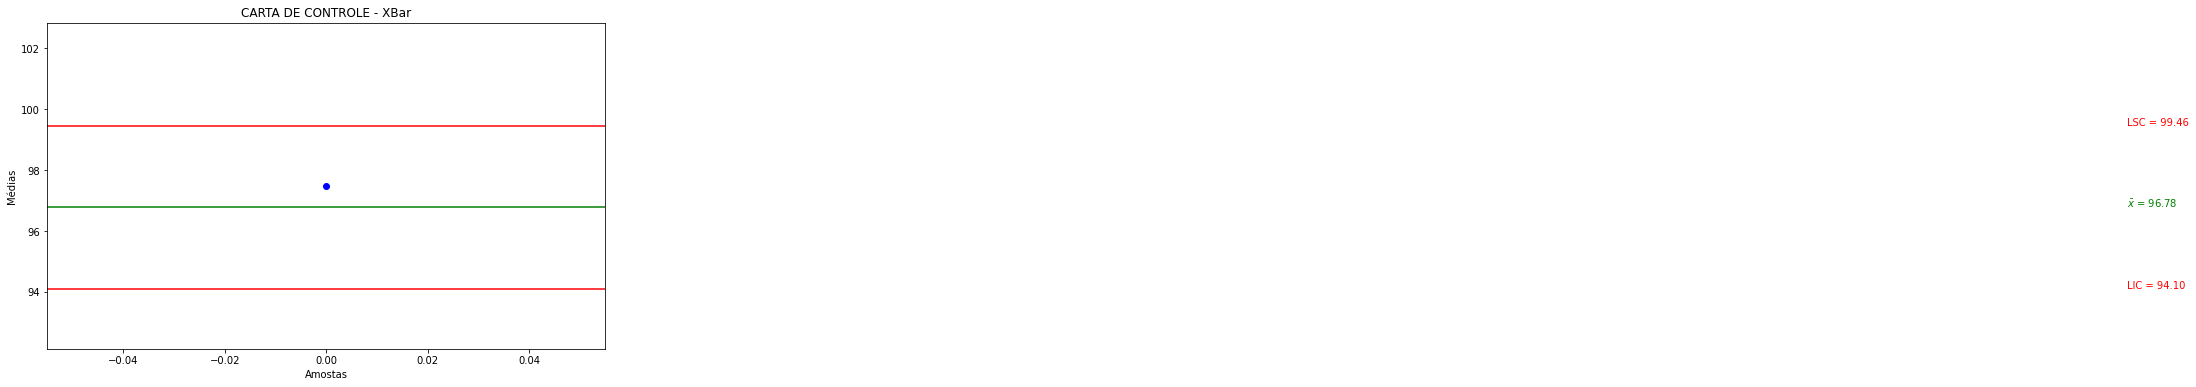

In [38]:
#Criar um novo modelo de amostras para o dataset

sample_dataset = generate_dataset(97, 2, 12, 24, 99)

#Criar uma lista para agrupar as médias de cada amostras

sample_x_bar = []


#Criar um grupo para armazenar as amostras do desvio padrão
sample_stddev = []

#Agrupar as amostrar do grupo médio e do desvio padrão

for group in sample_dataset:
  sample_x_bar.append(group.mean())
  sample_stddev.append(np.std(group))



  #Plotar o gráfico da carta de Média XBar chat
  fig, ax = plt.subplots(figsize = (10, 6))

  #Criar a carta da média XBar chart
  ax.plot(sample_x_bar, linestyle='-', marker='o', color='blue')


  #Criar o limite de Controle Superior

  LSC = process_mean + 3 * process_stddev
  ax.axhline(LSC, color='red')


  #Criar o limite inferior de controle

  LIC = process_mean - 3 * process_stddev

  ax.axhline(LIC, color='red')

  #Criar a linha da Média - XBar 

  ax.axhline(process_mean, color='green')

  #Criar um titulo para a carta de controle
  ax.set_title('CARTA DE CONTROLE - XBar')

  # Rotulos os eixos
  ax.set(xlabel='Amostas', ylabel='Médias')


  #Determinar os limites para a carta de controle em seus respectivos valores

  left, right = ax.get_xlim()
  ax.text(right + 0.3, LSC, "LSC = " + str("{:.2f}".format(LSC)), color='red')
  #ax.text(right + 0.3, process_mean, r'$\bar{x}$' + " = " + str("{:.2f}" + " = " + str("{:.2f}".format(process_mean)), color='green'))
  ax.text(right + 0.3, process_mean, r'$\bar{x}$' + " = " + str("{:.2f}".format(process_mean)), color='green')

  ax.text(right + 0.3, LIC, "LIC = " + str("{:.2f}".format(LIC)), color='red')
  


Text(1.35, 94.09677438858509, 'LCL = 94.10')

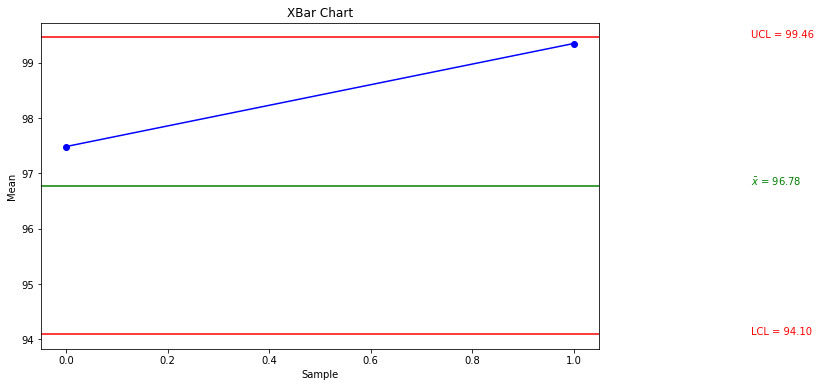

In [40]:
 #Create a second sample dataset
sample_dataset_2 = generate_dataset(99.5, 1, 12, 12)

sample_dataset = np.concatenate((sample_dataset, sample_dataset_2))

# Create a list to store the sample groups means
sample_x_bar = []

# Create a list to store the sample groups standard deviations
sample_stddev = [] 

# Combine the sample groups means and standard deviations
for group in sample_dataset:
    sample_x_bar.append(group.mean())
    sample_stddev.append(np.std(group))

# Plot the XBar chart
fig, ax = plt.subplots(figsize = (10, 6))

# Create the XBar chart
ax.plot(sample_x_bar, linestyle='-', marker='o', color='blue')

# Create the Upper Control Limit Line
UCL = process_mean + 3 * process_stddev
ax.axhline(UCL, color='red')

# Create the Lower Control Limit Line
LCL = process_mean - 3 * process_stddev
ax.axhline(LCL, color='red')

# Create the Xbar line
ax.axhline(process_mean, color='green')

# Create a chart title
ax.set_title('XBar Chart')

# Label the axes
ax.set(xlabel='Sample', ylabel='Mean')

# Determine the x-axis limits in the chart to attach reference values
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL, "UCL = " + str("{:.2f}".format(UCL)), color='red')
ax.text(right + 0.3, process_mean, r'$\bar{x}$' + " = " + str("{:.2f}".format(process_mean)), color='green')
ax.text(right + 0.3, LCL, "LCL = " + str("{:.2f}".format(LCL)), color='red')